In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
x = []
y = []
origin = []
with open('nose.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        origin.append(row)
        data = [int(d) for d in row[1:]]
        n = int(len(data)/2)
        x.append(data[:n])
        y.append(data[n:])
num = len(x)
print("data num:",num)        

data num: 14187


In [32]:
from math import atan2, degrees
def cal_angle(x, y):
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    d1 = degrees(atan2(dy,dx))
    dx = x[1]-x[2]
    dy = y[1]-y[2]
    d2 = degrees(atan2(dy,dx))
    return d1+d2

In [17]:
angles1 = []
angles2 = []
labels = []
dys = []
dxs = []
wide = 0
long = 0
small = 0
for i in range(num):
    rx = x[i]
    ry = y[i]
    dy = ry[6]-ry[0]
    dx = rx[8]-rx[4]
    dxs.append(dx)
    dys.append(dy)
    if dy < 140:
        labels.append("small")
        small +=1
    elif dx > 90:
        labels.append("wide")
        wide+=1
    else:
        labels.append("long")    
        long+=1

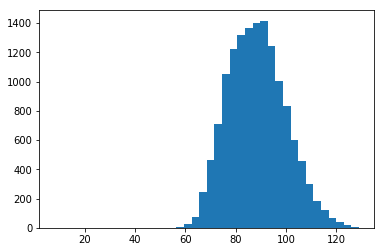

In [7]:
plt.hist(dxs, bins=40)
plt.show()

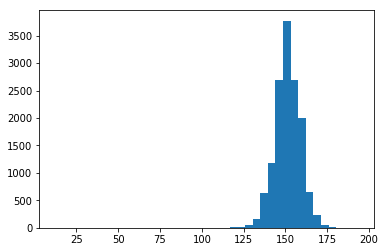

In [8]:
plt.hist(dys, bins=40)
plt.show()

In [18]:
print(wide)
print(small)
print(long)

5294
887
8006


Text(0,0.5,'dy')

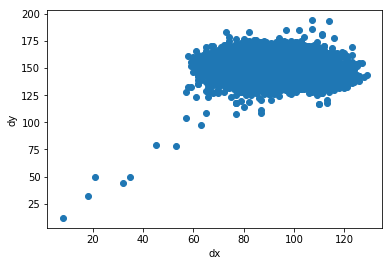

In [19]:
# from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(dxs,dys)
plt.xlabel('dx')
plt.ylabel('dy')

In [20]:
labels = np.asarray(labels).reshape((num,1))
origin = np.asarray(origin).reshape((num,2*n+1))
output = np.hstack((origin,labels))

In [22]:
with open('nose_labels.csv','w',encoding='utf8',newline='') as file:
    wr = csv.writer(file) #, quoting=csv.QUOTE_ALL)
    wr.writerows(output)